In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Mendoza Hernandez Carlos Emiliano**

1. Simula (con el metodo de tu eleccion) las siguientes distribuciones
- Bernoulli con parametro $p$.
- Binomial con parametros $(n,p)$.
- Geometrica con parametro $p$.
- Poisson con parametro $\lambda$.
- Uniforme sobre el intervalo $[a,b]$.
- Exponencial con parametro $\lambda$.

EN ESTE EJERCICIO SOLO SE PUEDEN SIMULAR VARIABLES ALEATORIAS UNIFORMES(0,1) A TRAVES DE FUNCIONES PREDETERMINADAS, O BIEN UTILIZAR FUNCIONES QUE PREVIAMENTE HAYAS CONSTRUIDO.

Para cada distribucion debes de crear una funcion donde el usuario pueda especificar, el numero de muestras a simular, $m$, (por ejemplo $m=50$ variables aleatorias Bernoulli), y los parametros de la distribucion. La salida de cada funcion debe ser un vector de tamaño $m$ que contenga las muestras. Ademas de esto grafica el histograma de las muestras obtenidas.

- **Bernoulli**

In [2]:
def bernoulli_simulation(m, p):
    """Simulate m Bernoulli trials with probability p of success.
    
    Parameters
    ----------
    m : int
        Number of trials.
        p : float
        Probability of success.
        
    Returns
    -------
    bernoulli : ndarray, shape (m,)
        Simulated outcomes of the Bernoulli trials.
    """
    u = np.random.uniform(0, 1, m)
    bernoulli_samples = (u < p).astype(int)
    plt.hist(bernoulli_samples, bins=np.arange(-0.5, 2, 1), edgecolor='black', density=True)
    plt.title(f'Histograma de {m} muestras de Bernoulli (p={p})')
    plt.xlabel('Valor')
    plt.ylabel('Proporcion')
    plt.xticks([0, 1])
    plt.show()
    return bernoulli_samples

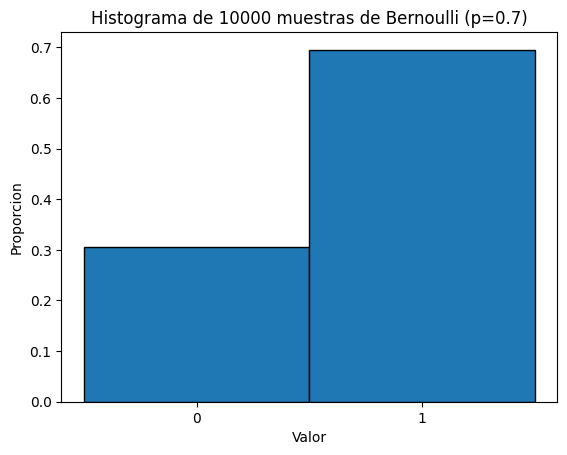

In [3]:
m = 10000
p = 0.7
bernoulli_samples = bernoulli_simulation(m, p)

- **Binomial**

In [4]:
def binomial_simulation(m, n, p):
    """Simulate n Bernoulli trials with probability p of success.
    
    Parameters
    ----------
    n : int
        Number of trials.
    p : float
        Probability of success.
        
    Returns
    -------
    binomial : ndarray, shape (n,)
        Simulated outcomes of the Bernoulli trials.
    """
    binomial_samples = np.zeros(m)
    for i in range(m):
        u = np.random.uniform(0, 1, n)
        binomial_samples[i] = np.sum(u < p)
    plt.hist(binomial_samples, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black', density=True)
    plt.title(f'Histograma de {m} muestras de Binomial (n={n}, p={p})')
    plt.xlabel('Número de éxitos')
    plt.ylabel('Frecuencia')
    plt.xticks(np.arange(0, n+1, 1))
    plt.show()
    return binomial_samples

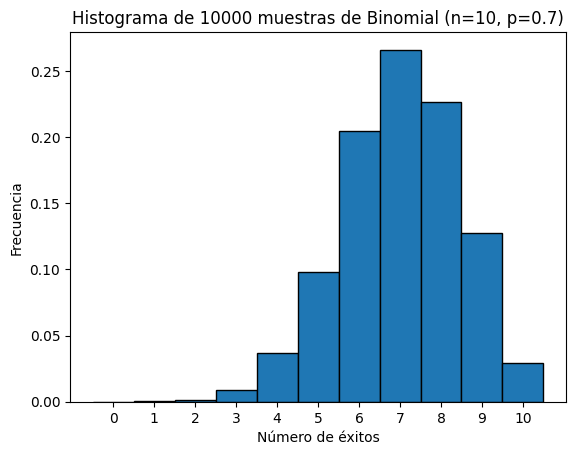

In [5]:
m = 10000
n = 10
p = 0.7
binomial_samples = binomial_simulation(m, n, p)

- **Geometrica**

In [6]:
def geometric_simulation(m, p):
    """Simulate m geometric random variables with probability p of success.
    
    Parameters
    ----------
    m : int
        Number of random variables.
    p : float
        Probability of success.
        
    Returns
    -------
    geometric : ndarray, shape (m,)
        Simulated geometric random variables.
    """
    geometric_samples = np.zeros(m)
    for i in range(m):
        u = np.random.uniform(0, 1)
        geometric_samples[i] = np.ceil(np.log(u)/np.log(1-p))
    plt.hist(geometric_samples, bins=np.arange(0.5, np.max(geometric_samples)+1.5, 1), edgecolor='black', density=True)
    plt.title(f'Histograma de {m} muestras de Geométrica (p={p})')
    plt.xlabel('Número de intentos hasta el primer éxito')
    plt.ylabel('Proporción')
    plt.xticks(np.arange(1, np.max(geometric_samples)+1, 1))
    plt.show()
    return geometric_samples

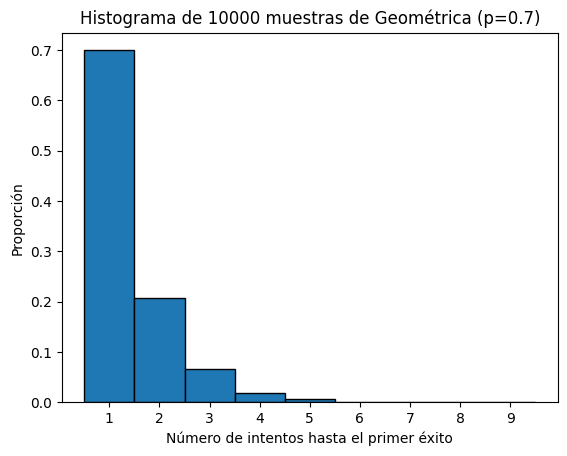

In [7]:
m = 10000
p = 0.7
geometric_samples = geometric_simulation(m, p)

- **Poisson**

In [8]:
def poisson_simulation(m, l):
    """Simulate m Poisson random variables with rate l.
    
    Parameters
    ----------
    m : int
        Number of random variables.
    l : float
        Rate.
        
    Returns
    -------
    poisson : ndarray, shape (m,)
        Simulated Poisson random variables.
    """
    poisson_samples = np.zeros(m)
    for i in range(m):
        s = 0
        count = 0
        while s < l:
            u = np.random.uniform(0, 1)
            s += -np.log(u)
            count += 1
        poisson_samples[i] = count-1
    plt.hist(poisson_samples, bins=np.arange(-0.5, np.max(poisson_samples)+1.5, 1), edgecolor='black')
    plt.title(f'Histograma de {m} muestras de Poisson (λ={l})')
    plt.xlabel('Número de eventos')
    plt.ylabel('Conteo')
    plt.xticks(np.arange(0, np.max(poisson_samples)+1, 1))
    plt.show()
    return poisson_samples

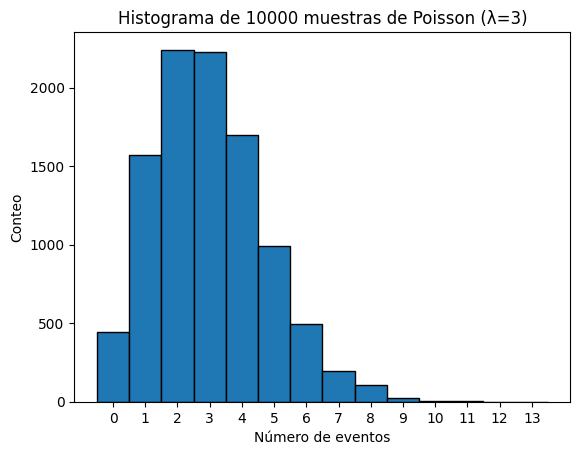

In [9]:
m = 10000
l = 3
poisson_samples = poisson_simulation(m, l)

- **Uniforme**

In [10]:
def uniform_simulation(m, a, b, plot = True):
    """Simulate m uniform random variables in the interval [a, b).
    
    Parameters
    ----------
    m : int
        Number of random variables.
    a : float
        Lower bound.
    b : float
        Upper bound.
        
    Returns
    -------
    uniform : ndarray, shape (m,)
        Simulated uniform random variables.
    """
    uniform_samples = a+(b-a)*np.random.uniform(0, 1, m)
    if plot:
        plt.hist(uniform_samples, edgecolor='black')
        plt.title(f'Histograma de {m} muestras de Uniforme({a}, {b})')
        plt.xlabel('Valor')
        plt.ylabel('Conteo')
        plt.show()
    return uniform_samples

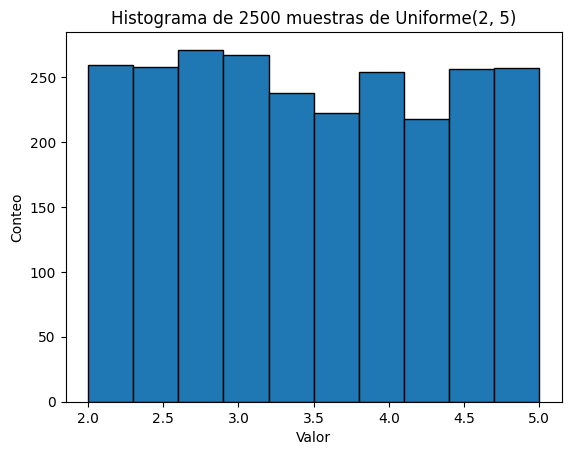

In [11]:
m = 2500
a = 2
b = 5
uniform_samples = uniform_simulation(m, a, b)

- **Exponencial**

In [12]:
def exponential_simulation(m, l):
    """Simulate m exponential random variables with rate l.
    
    Parameters
    ----------
    m : int
        Number of random variables.
    l : float
        Rate.
        
    Returns
    -------
    exponential : ndarray, shape (m,)
        Simulated exponential random variables.
    """
    exponential_samples = -np.log(np.random.uniform(0, 1, m))/l
    plt.hist(exponential_samples, bins=30, edgecolor='black')
    plt.title(f'Histograma de {m} muestras de Exponencial (λ={l})')
    plt.xlabel('Valor')
    plt.ylabel('Conteo')
    plt.show()
    return exponential_samples

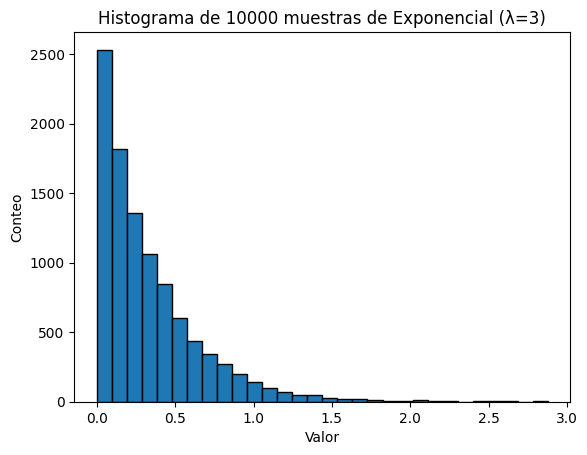

In [13]:
m = 10000
lam = 3
exponential_samples = exponential_simulation(m, lam)

2. Utilizando el método de *Aceptación-Rechazo* simula de una distribución con función densidad:

$$
\pi(x) \propto x^{\alpha - 1}(1 - x)^{\beta - 1} \mathbf{1}_{[0,1]}(x).
$$

Debes de crear una función donde el usuario pueda especificar el número de muestras a simular, $m$, y los parámetros $1 < \alpha < 10$ y $1 < \beta < 10$ de la distribución. Además, se debe graficar el histograma de la muestra obtenida.


In [14]:
def simulation_by_accept_reject(m, alpha, beta):
    if not 1 < alpha < 10:
        raise ValueError(f"alpha must be in the interval (1, 10), given: {alpha}")
    if not 1 < beta < 10:
        raise ValueError(f"beta must be in the interval (1, 10), given: {beta}")
    density_function = lambda x: (x**(alpha-1))*((1-x)**(beta-1))
    max_density = np.max(density_function(np.linspace(0, 1, 10000)))
    acceptance_function = lambda x: density_function(x) / max_density
    proposed_samples = uniform_simulation(m, 0, 1, False)
    random_uniform_samples = np.random.uniform(0, 1, m)
    accepted_samples = random_uniform_samples <= acceptance_function(proposed_samples)
    samples = proposed_samples[accepted_samples]
    plt.hist(samples, bins=50, edgecolor='black')
    plt.title(f'Histograma de {m} muestras de Beta(α={alpha}, β={beta})')
    plt.xlabel('Valor')
    plt.ylabel('Conteo')
    plt.show()
    return samples

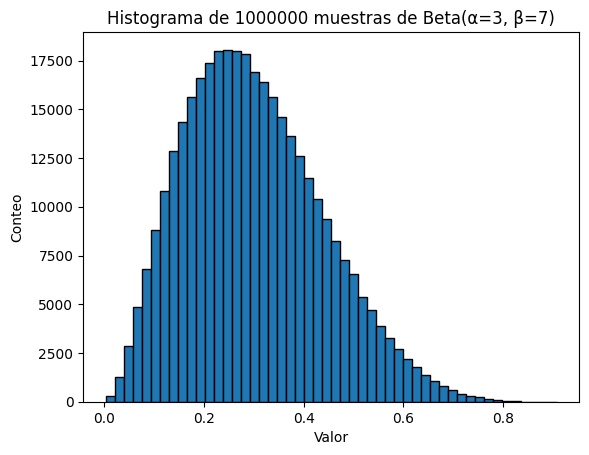

In [15]:
m = 1000000
alpha = 3
beta = 7
samples = simulation_by_accept_reject(m, alpha, beta)

3. Utilizando el método de *Metropolis-Hastings*, con un periodo de calentamiento de 1000 iteraciones, simula de una distribución con función densidad:

$$
\pi(x) \propto x^{\alpha - 1} e^{-\beta x} \mathbf{1}_{[0,\infty)}(x).
$$

EN ESTE EJERCICIO PUEDES USAR FUNCIONES PRETERMINADAS PARA SIMULAR VARIABLES ALEATORIAS NORMALES. Debes de crear una función donde el usuario pueda especificar el número de muestras a simular, $m$, y los parámetros $\alpha > 0$ y $\beta > 0$ de la distribución. Además de esto, gráfica el histograma de la muestra obtenida.


In [16]:
def metropolis_hastings(m, alpha, beta, burn_in=1000):
    def distribution(x, alpha, beta):
        if x < 0:
            return 0
        return (x**(alpha-1))*np.exp(-beta*x)
    samples = []
    current_x = np.random.uniform(0, 1)
    for i in range(m + burn_in):
        proposed_x = np.random.normal(current_x, 0.5)
        acceptance_ratio = distribution(proposed_x, alpha, beta)/distribution(current_x, alpha, beta)
        if np.random.uniform(0, 1) < acceptance_ratio:
            current_x = proposed_x
        if i >= burn_in:
            samples.append(current_x)
    plt.hist(samples, bins=50, edgecolor='black')
    plt.title(f'Histograma de {m} muestras (α={alpha}, β={beta})')
    plt.xlabel('Valor')
    plt.ylabel('Conteo')
    plt.show()
    return np.array(samples)

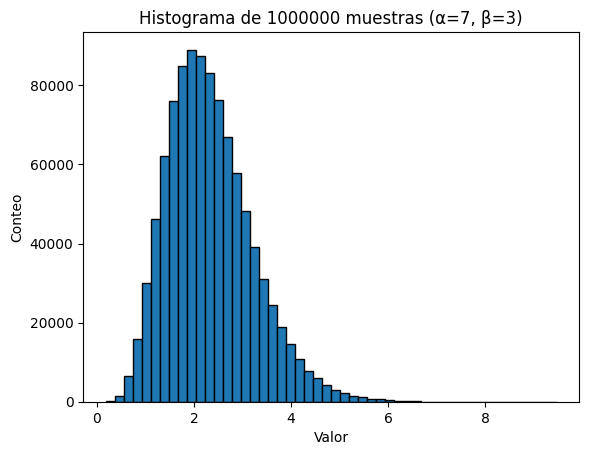

In [17]:
m = 1000000
alpha = 7
beta = 3
samples = metropolis_hastings(m, alpha, beta)

4. Utilizando el método *Gibbs Sampler*, con un periodo de calentamiento de 1000 iteraciones, simula de una distribución con función de densidad conjunta:

$$\pi(X,Y) \propto \exp\left\{ \frac{-X^2 - 2\rho XY + Y^2}{2(1 - \rho^2)} \right\}.$$

Para esta distribución se sabe que $ X \mid Y \sim \mathcal{N}(\rho Y, 1-\rho^2) $ y $ Y \mid X \sim \mathcal{N}(\rho X, 1-\rho^2) $. Es decir, las distribuciones condicionales de $X$ dado $Y$ y de $Y$ dado $X$ son ambas distribuciones Normales (univariadas) con los parámetros indicados.

EN ESTE EJERCICIO PUEDES USAR FUNCIONES PRETERMINADAS PARA SIMULAR VARIABLES ALEATORIAS NORMALES UNIVARIADAS. Debes crear una función donde el usuario pueda especificar el número de muestras a simular, $ m $, y el parámetro $ 0 < \rho < 1 $ de la distribución. Además de esto, grafica la muestra a través de un *scatter plot*.

In [18]:
def gibbs_sampler(m, rho, burn_in=1000):
    x = np.zeros(m + burn_in)
    y = np.zeros(m + burn_in)
    x[0] = np.random.normal(0, 1)
    y[0] = np.random.normal(0, 1)
    for i in range(1, m + burn_in):
        x[i] = np.random.normal(rho*y[i-1], np.sqrt(1-rho**2))
        y[i] = np.random.normal(rho*x[i], np.sqrt(1-rho**2))
    x_samples = x[burn_in:]
    y_samples = y[burn_in:]
    plt.scatter(x_samples, y_samples, s=10, alpha=0.5)
    plt.title(f'Muestras obtenidas usando Gibbs Sampler ρ = {rho}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return x_samples, y_samples

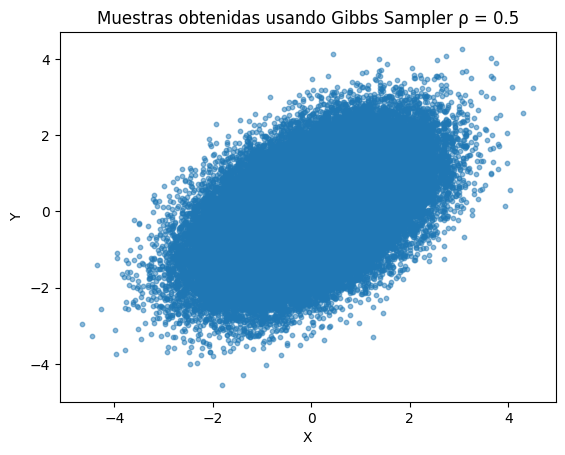

In [19]:
rho = 0.5
m = 100000
x_samples, y_samples = gibbs_sampler(m, rho)